<a href="https://colab.research.google.com/github/Metmag/coursera-test-1st/blob/main/MSc_PrjtCIFAR10Reduced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib .pyplot as plt
import os
import time


In [ ]:
#lOAD THE cifar10 dataset wihich is hoisted in kears library
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
#View the dataset shape and channels
train_images.shape

(50000, 32, 32, 3)

In [ ]:
train_labels.shape

(50000, 1)

In [ ]:
test_images.shape

(10000, 32, 32, 3)

In [ ]:
(Train_images, Train_labels ) = (train_images[:1500], train_labels[:1500] )

In [ ]:
(Test_images, Test_labels ) = (test_images[:1500], test_labels[:1500] )

In [ ]:
Train_images.shape

(1500, 32, 32, 3)

In [ ]:
Train_labels.shape

(1500, 1)

In [ ]:
Test_labels.shape

(1500, 1)

In [ ]:
Test_images.shape

(1500, 32, 32, 3)

In [ ]:
#CIFAR10 dataset came with 2 partitions: 50,000 training set and 10,000 test set.
#We need to create a validation set of 5000 images
(validation_labels, validation_images) = (train_labels[:400], train_images[:400])
#(Train_images, Train_labels) = (train_images[1500:], train_labels[1500:])


In [ ]:
Train_images.shape

(1500, 32, 32, 3)

In [ ]:
Train_labels.shape

(1500, 1)

In [ ]:
validation_images.shape

(400, 32, 32, 3)

In [ ]:
validation_labels.shape

(400, 1)

In [ ]:
#create a variable name for the images for reference purposes
classes = ['airplane', 'automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']



In [ ]:
#Transform our dataset into the form that correspond to TensorFlow Dataset representation.
#By using tf.data.Dataset.form_tensor_slices method
train_ds = tf.data.Dataset.from_tensor_slices((Train_images, Train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((Test_images, Test_labels))
validation_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))

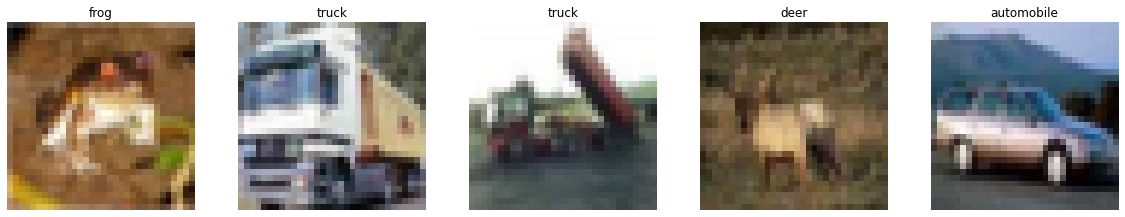

In [ ]:
#Visualize the images within the CIFAR10 dataset
#Note: CIFAR10 images have poor resolutions.
plt.figure(figsize=(20,20))
for i, (image, label) in enumerate(train_ds.take(5)):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(classes[label.numpy()[0]])
    plt.axis('off')


In [ ]:
#Normalizing and standardizing our images
#Resizing the images from 32x32 to 227x227 for AlexNet model
def process_images(image, label):
  image = tf.image.per_image_standardization(image)
  #
  image = tf.image.resize(image, (227,227))
  return image, label

In [ ]:
Train_images.shape

(1500, 32, 32, 3)

In [ ]:
#Prepare the dataset for shuffling
train_size = tf.data.experimental.cardinality(train_ds).numpy()
test_size = tf.data.experimental.cardinality(test_ds).numpy()
validation_size = tf.data.experimental.cardinality(validation_ds).numpy()
print("Training size:", train_size)
print("Test_size:", test_size)
print("Validation_size:", validation_size)

Training size: 1500
Test_size: 1500
Validation_size: 400


In [ ]:
#Three primary ops:
#1 Preprocessing the data within the dataset
#2 Shuffle the dataset 
#Batch data within the dataset

train_ds = (train_ds.map(process_images)
                    .shuffle(buffer_size=train_size)
                    .batch(batch_size=32, drop_remainder=True))
test_ds = (test_ds.map(process_images)
                  .shuffle(buffer_size=test_size)
                  .batch(batch_size=32, drop_remainder=True))
validation_ds = (validation_ds
                 .map(process_images)
                 .shuffle(buffer_size=validation_size)
                 .batch(batch_size=32, drop_remainder=True))

In [ ]:
#Model implementation of AlexNet include the following
#Convolutional layer
#Batch Normalisation layer
#Maxpooling layer
#Flatten layer
#Dense layer
#Activation function
#ReLU
#Softmax Activation Function
#Drop out


model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

**TensorBoard**

In [ ]:
#Computer tensorboard to monitor the progress netwotk training
#For example training loss, training accuracy, validation loss, validation accuracy

root_logdir = os.path.join(os.curdir, "logs\\fit\\")

def get_run_logdir():
  run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
  return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [ ]:
#Training the model involve incorporating the following parameter
#Loss function
#Optimisation algorithm
#Learning rate
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


                                                                 
 dense (Dense)               (None, 4096)              37752832  
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout_1 (Dropout)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                40970     
                                                                 
Total params: 58,327,818
Trainable params: 58,325,066
Non-trainable params: 2,752
_________________________________________________________________


In [ ]:
#.fit() method is used to train the algorithm
#Epoch: the nmber of time AleNet network is exposed to all the data point in the training set.

model.fit(train_ds,
          epochs=50,
          validation_data=validation_ds,
          validation_freq=1,
          callbacks=[tensorboard_cb])

Epoch 1/50
46/46 [==============================] - 276s 6s/step - loss: 3.8428 - accuracy: 0.1658 - val_loss: 2.2503 - val_accuracy: 0.1953
Epoch 2/50
46/46 [==============================] - 258s 6s/step - loss: 2.9168 - accuracy: 0.2418 - val_loss: 2.1254 - val_accuracy: 0.3229
Epoch 3/50
46/46 [==============================] - 278s 6s/step - loss: 2.5989 - accuracy: 0.2745 - val_loss: 1.9407 - val_accuracy: 0.4245
Epoch 4/50
46/46 [==============================] - 279s 6s/step - loss: 2.2768 - accuracy: 0.3111 - val_loss: 1.7090 - val_accuracy: 0.4792
Epoch 5/50
46/46 [==============================] - 270s 6s/step - loss: 2.0116 - accuracy: 0.3811 - val_loss: 1.4927 - val_accuracy: 0.5469
Epoch 6/50
46/46 [==============================] - 256s 6s/step - loss: 1.9003 - accuracy: 0.3961 - val_loss: 1.2563 - val_accuracy: 0.6302
Epoch 7/50
46/46 [==============================] - 258s 6s/step - loss: 1.7453 - accuracy: 0.4205 - val_loss: 1.1381 - val_accuracy: 0.6432
Epoch 8/50
46